# SUPPORT VECTOR MACHINE

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\17 SVM\mushroom.csv')

In [3]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
data['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [6]:
## Unnamed: 0 column in our dataset nolds no importance so we will drop it. Our target columnn is class and remaining are features.

In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [9]:
## check null values
data.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [10]:
## check for duplicate rows
data.duplicated().any()

True

In [11]:
data[data.duplicated()]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,bell,smooth,pink,no,foul,notched,distant,broad,pink,enlarging,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,enlarging,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,conical,grooves,brown,no,foul,free,distant,broad,white,tapering,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,sunken,smooth,white,no,anise,attached,crowded,broad,black,tapering,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,enlarging,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,flat,scaly,pink,no,spicy,attached,distant,narrow,red,enlarging,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().any()

False

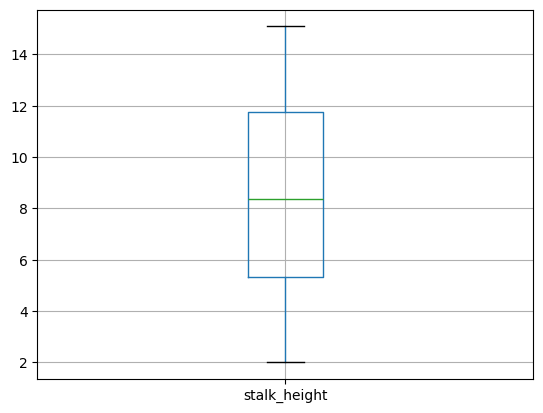

In [14]:
data.boxplot('stalk_height')
plt.show();

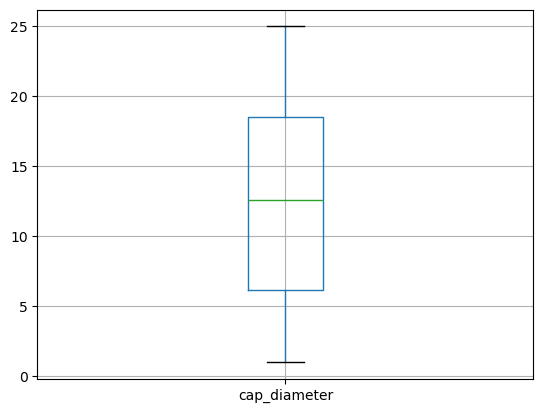

In [15]:
data.boxplot('cap_diameter')
plt.show();

In [16]:
## our dataset is now free from null values, duplicate rows and outliers

In [17]:
num_col=[i for i in data.columns if data[i].dtypes!='O']

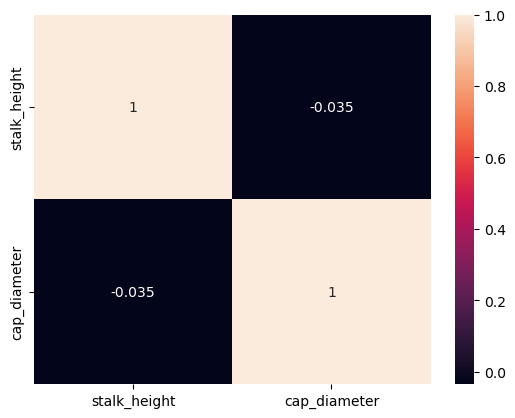

In [18]:
sns.heatmap(data[num_col].corr(),annot=True)
plt.show();

In [19]:
## No correlation between numerical columns

### Data Visualization

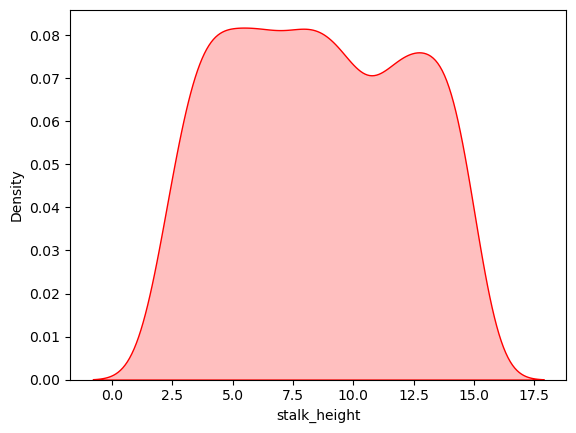

In [20]:
sns.kdeplot(data=data['stalk_height'],fill=True,color='red')
plt.show();

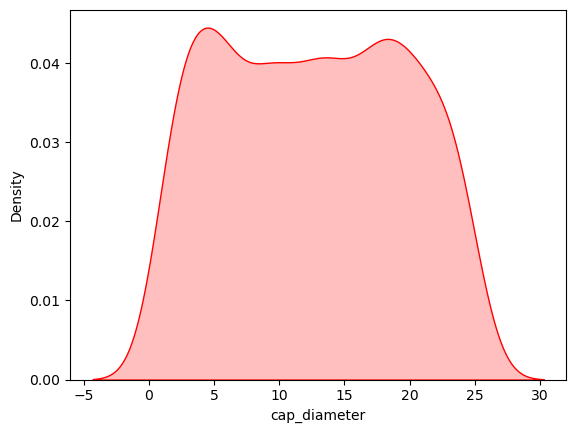

In [21]:
sns.kdeplot(data=data['cap_diameter'],fill=True,color='red')
plt.show();

In [22]:
## both the numerical columns shows negative kurtosis but no skewness which can be manually verified as below

In [23]:
data['stalk_height'].kurt()

-1.1884926186612321

In [24]:
data['stalk_height'].skew()

0.04532634534862736

In [25]:
data['cap_diameter'].kurt()

-1.2253666394721976

In [26]:
data['cap_diameter'].skew()

0.029897708226878247

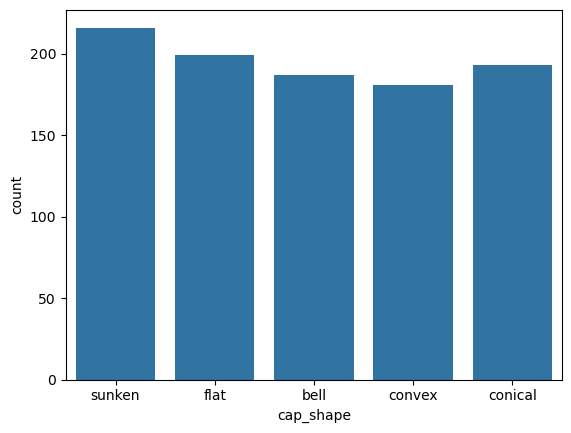

In [27]:
sns.countplot(data=data,x='cap_shape')
plt.show();

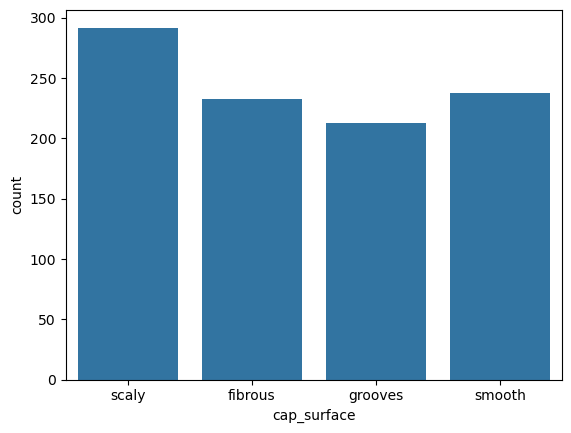

In [28]:
sns.countplot(data=data,x='cap_surface')
plt.show();

In [29]:
## count plot of first two features shows data is normally distributed

### Data Preprocessing

In [30]:
data['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [31]:
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder

In [32]:
ord_enc=OrdinalEncoder()
min_max=MinMaxScaler()

In [33]:
data.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [34]:
## Now we will apply ordinal encoder to all the categorical columns in features

In [35]:
cat_col=[i for i in data.columns if data[i].dtypes=='O']

In [36]:
data[cat_col]=ord_enc.fit_transform(data[cat_col])

In [37]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.0,14.276173,5.054983
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0.0,3.952715,19.068319
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,1.0,9.054265,7.205884
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,1.0,5.226499,20.932692
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1.0,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1.0,1.0,0.0,0.0,4.0,3.0,1.0,0.0,3.0,1.0,...,1.0,0.0,0.0,3.0,1.0,2.0,3.0,0.0,13.020616,9.993008
1988,0.0,1.0,4.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,2.0,5.0,8.0,2.0,0.0,1.0,3.751597,18.868135
1989,4.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,4.0,5.0,0.0,0.0,0.0,13.134058,15.740028
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,0.0,2.0,1.0,7.0,8.0,2.0,5.0,1.0,6.500840,13.501957


In [38]:
num_col

['stalk_height', 'cap_diameter']

In [39]:
data[num_col]=min_max.fit_transform(data[num_col])

In [40]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.0,0.937466,0.168957
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0.0,0.149118,0.752845
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,1.0,0.538696,0.258578
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,1.0,0.246390,0.830527
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1.0,0.919242,0.481051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1.0,1.0,0.0,0.0,4.0,3.0,1.0,0.0,3.0,1.0,...,1.0,0.0,0.0,3.0,1.0,2.0,3.0,0.0,0.841585,0.374708
1988,0.0,1.0,4.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,2.0,5.0,8.0,2.0,0.0,1.0,0.133760,0.744504
1989,4.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,4.0,5.0,0.0,0.0,0.0,0.850248,0.614166
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,0.0,2.0,1.0,7.0,8.0,2.0,5.0,1.0,0.343705,0.520914


In [41]:
data.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,...,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2.065574,1.548156,3.924180,0.514344,3.965164,1.534836,0.997951,0.510246,5.445697,0.463115,...,0.512295,1.481557,0.960041,3.585041,3.973361,2.427254,3.065574,0.633197,0.498255,0.483272
std,1.432159,1.101857,2.625006,0.500050,2.547762,1.121727,0.813978,0.500151,3.385205,0.498893,...,0.500105,1.114781,0.812367,2.296696,2.627528,1.712948,1.945884,0.482179,0.282782,0.291128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,2.000000,0.750000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.254051,0.214215
50%,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.000000,1.000000,5.000000,0.000000,...,1.000000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,0.486232,0.484419
75%,3.000000,2.000000,6.000000,1.000000,6.000000,3.000000,2.000000,1.000000,8.000000,1.000000,...,1.000000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,0.745214,0.731656
max,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.000000,1.000000,11.000000,1.000000,...,1.000000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,1.000000,1.000000


In [42]:
features=data.drop('class',axis=1)
target=data[['class']]

In [43]:
features

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0,0.937466,0.168957
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0.149118,0.752845
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0,0.538696,0.258578
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0,0.246390,0.830527
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0,0.919242,0.481051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1.0,1.0,0.0,0.0,4.0,3.0,1.0,0.0,3.0,1.0,...,8.0,1.0,0.0,0.0,3.0,1.0,2.0,3.0,0.841585,0.374708
1988,0.0,1.0,4.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,...,5.0,0.0,0.0,2.0,5.0,8.0,2.0,0.0,0.133760,0.744504
1989,4.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,6.0,1.0,1.0,2.0,4.0,5.0,0.0,0.0,0.850248,0.614166
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0,0.343705,0.520914


In [44]:
target

,class
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
1985,0.0
1988,1.0
1989,0.0
1996,1.0


In [45]:
## out features and target is ready to pass on to algorithm

### SVM Implementation

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [47]:
## train test split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(732, 24)
(244, 24)
(732, 1)
(244, 1)


In [49]:
## define model with arbitrary hyperparameters
model=SVC(C=1.0,kernel='rbf',gamma=0.5)

In [50]:
## train the model
model.fit(x_train,y_train)

SVC(gamma=0.5)

In [51]:
y_pred=model.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.5901639344262295

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       100
         1.0       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



In [54]:
target.value_counts()

class
1.0      618
0.0      358
Name: count, dtype: int64

In [55]:
## We see that the model has not performed well specially for class 0. We will use grid search to find best hyperparameters.

In [56]:
params={'C':[0.1,5,10,50,100],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [57]:
grid_search=GridSearchCV(model,params)

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(gamma=0.5),
             param_grid={'C': [0.1, 5, 10, 50, 100],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf']})

In [59]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [60]:
## We will apply these parameters to the model

In [61]:
model=SVC(C=0.1,kernel='rbf',gamma=0.1)

In [62]:
model.fit(x_train,y_train)

SVC(C=0.1, gamma=0.1)

In [63]:
y_pred=model.predict(x_test)

In [64]:
## Testing validation
accuracy_score(y_test,y_pred)

0.5901639344262295

In [65]:
## Still the accuracy of the model using rbf kernel is 59 percent

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       100
         1.0       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



In [67]:
## model is not performing for class 0 in testing validation

In [68]:
## training validation
y_predict=model.predict(x_train)
accuracy_score(y_train,y_predict)

0.6475409836065574

In [69]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       258
         1.0       0.65      1.00      0.79       474

    accuracy                           0.65       732
   macro avg       0.32      0.50      0.39       732
weighted avg       0.42      0.65      0.51       732



In [70]:
## in training validation, accuracy improved to 65 percent however the model is not performing for class 0. Class imbalance may be one of the reason.

### Visualization of SVM Results

In [71]:
## this has not been covered up by our trainer.

### Parameter Tuning and Optimization, Comparison and Analysis

In [72]:
## we will try using linear kernel

In [73]:
model_linear=SVC(C=0.1,kernel='linear',gamma=0.1)

In [74]:
model_linear.fit(x_train,y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [75]:
y_pred_l=model_linear.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred_l)

0.5901639344262295

In [77]:
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       100
         1.0       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



In [78]:
## since we are getting same result we will try to resample features and target using SMOTE

In [79]:
!pip install imblearn

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smote=SMOTE()

In [82]:
features,target=smote.fit_resample(features,target)

In [83]:
features.shape

(1236, 24)

In [84]:
target.shape

(1236, 1)

In [85]:
target.value_counts()

class
0.0      618
1.0      618
Name: count, dtype: int64

In [86]:
## now we have a balanced dataset. Both the class (0 and 1) counts are same. Now we will perform train test split and build algorithm.

In [87]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=50)

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(927, 24)
(309, 24)
(927, 1)
(309, 1)


In [89]:
## model using linear kernel

In [90]:
model_linear=SVC(C=0.1,kernel='linear',gamma=0.1)

In [91]:
model_linear.fit(x_train,y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [92]:
y_pred_l=model_linear.predict(x_test)

In [93]:
accuracy_score(y_test,y_pred_l)

0.5080906148867314

In [94]:
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

         0.0       0.55      0.46      0.50       167
         1.0       0.47      0.57      0.52       142

    accuracy                           0.51       309
   macro avg       0.51      0.51      0.51       309
weighted avg       0.52      0.51      0.51       309



In [95]:
## we will use grid search to find best parameters

In [96]:
params={'C':[0.1,0.2,0.3,0.4,0.5,1,2,5],'kernel':['linear'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [97]:
grid_search=GridSearchCV(model_linear,params)

In [98]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=0.1, gamma=0.1, kernel='linear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['linear']})

In [99]:
grid_search.best_params_

{'C': 0.2, 'gamma': 0.1, 'kernel': 'linear'}

In [159]:
## this means we used best parameters initially and maximum accuracy is 51% with F1 score as 50% and 52% for class 0 and 1 using linear kernel.

In [101]:
## using rbf kernel

In [102]:
model_rbf=SVC(C=0.1,kernel='rbf',gamma=0.1)

In [103]:
params={'C':[0.1,0.2,0.3,0.4,0.5,1,2,5],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [104]:
grid_search=GridSearchCV(model_rbf,params)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=0.1, gamma=0.1),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf']})

In [106]:
grid_search.best_params_

{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [107]:
model_rbf=SVC(C=2,kernel='rbf',gamma=0.1)

In [108]:
model_rbf.fit(x_train,y_train)

SVC(C=2, gamma=0.1)

In [109]:
y_pred_r=model_rbf.predict(x_test)

In [110]:
accuracy_score(y_test,y_pred_r)

0.8090614886731392

In [111]:
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

         0.0       0.99      0.65      0.79       167
         1.0       0.71      0.99      0.83       142

    accuracy                           0.81       309
   macro avg       0.85      0.82      0.81       309
weighted avg       0.86      0.81      0.81       309



In [160]:
## Using SMOTE to resample the class has helped and we have achieved 81% accuracy with F1 score as 79% and 83% for class 0 and 1 respectively using rbf kernel.

In [113]:
## using sigmoid kernel

In [114]:
model_sig=SVC(C=0.1,kernel='sigmoid',gamma=0.1)

In [115]:
params={'C':[0.1,0.2,0.3,0.4,0.5,1,2,5],'kernel':['sigmoid'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [116]:
grid_search=GridSearchCV(model_sig,params)

In [117]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=0.1, gamma=0.1, kernel='sigmoid'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['sigmoid']})

In [118]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [119]:
## we already used best parameters, now we check model performance

In [120]:
model_sig.fit(x_train,y_train)

SVC(C=0.1, gamma=0.1, kernel='sigmoid')

In [121]:
y_pred_s=model_sig.predict(x_test)

In [122]:
accuracy_score(y_test,y_pred_s)

0.459546925566343

In [123]:
print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       167
         1.0       0.46      1.00      0.63       142

    accuracy                           0.46       309
   macro avg       0.23      0.50      0.31       309
weighted avg       0.21      0.46      0.29       309



In [124]:
## model is not performing well using sigmoid kernel

In [125]:
## using poly kernel

In [126]:
model_poly=SVC(C=0.1,kernel='poly',degree=4,gamma=0.1)

In [127]:
model_poly.fit(x_train,y_train)

SVC(C=0.1, degree=4, gamma=0.1, kernel='poly')

In [128]:
y_pred_p=model_poly.predict(x_test)

In [129]:
accuracy_score(y_test,y_pred_p)

0.6957928802588996

In [130]:
params={'C':[0.1,0.2,0.3,0.4,0.5,1,2,5],'kernel':['poly'],'degree':[1],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [131]:
grid_search=GridSearchCV(model_poly,params)

In [132]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=0.1, degree=4, gamma=0.1, kernel='poly'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5], 'degree': [1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['poly']})

In [133]:
grid_search.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [134]:
model_poly=SVC(C=0.1,kernel='poly',degree=1,gamma=0.3)

In [135]:
model_poly.fit(x_train,y_train)

SVC(C=0.1, degree=1, gamma=0.3, kernel='poly')

In [136]:
y_pred_p=model_poly.predict(x_test)

In [137]:
accuracy_score(y_test,y_pred_p)

0.49514563106796117

In [138]:
## model not performed well using poly kernel. So far we achieved better accuracy using rbf kernel. We will try to tweak some parameters.

In [139]:
## Final model building

In [140]:
model_rbf=SVC(C=2,kernel='rbf',gamma=0.1)

In [141]:
params={'C':[1,2,3,4,5],'kernel':['rbf'],'gamma':[0.1,0.2,0.3]}

In [142]:
grid_search=GridSearchCV(model_rbf,params)

In [143]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=2, gamma=0.1),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [0.1, 0.2, 0.3],
                         'kernel': ['rbf']})

In [144]:
grid_search.best_params_

{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [145]:
## we already used best parameters to define the model

In [146]:
model_rbf.fit(x_train,y_train)

SVC(C=2, gamma=0.1)

In [147]:
## Training validation

In [148]:
y_pred_train=model_rbf.predict(x_train)

In [149]:
accuracy_score(y_train,y_pred_train)

1.0

In [150]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       451
         1.0       1.00      1.00      1.00       476

    accuracy                           1.00       927
   macro avg       1.00      1.00      1.00       927
weighted avg       1.00      1.00      1.00       927



In [151]:
## achieving 100% accuracy in training validation

In [152]:
## Testing validation

In [153]:
y_predict=model_rbf.predict(x_test)

In [154]:
accuracy_score(y_test,y_predict)

0.8090614886731392

In [155]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.65      0.79       167
         1.0       0.71      0.99      0.83       142

    accuracy                           0.81       309
   macro avg       0.85      0.82      0.81       309
weighted avg       0.86      0.81      0.81       309



In [161]:
## we conclude with the best support vector classification model as
## kernel=rbf, gamma=0.1, C=2, accuracy=81%, F1 score of category 'edible' = 79%, F1 score of category 'poisonous' = 83%

In [162]:
# Discuss practical implications of SVM in real-world classification tasks

In [163]:
## 1. Image Classification - SVM algorithm is trained on a set of labeled images. The algorithm then uses this training data to classify new images.
## 2. Text Classification - SVMs have been used to classify email as spam or not spam.
## 3. Fraud Detection - SVM algorithm is trained on a set of labeled transactions. The algorithm then uses this training data to detect new fraudulent transactions.
## 4. Recommender Systems - SVM algorithm is trained on a set of data that includes user preferences and item attributes. The algorithm then uses this training data to recommend new items to users.